In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
file_path = '/content/Email_Marketing_Campaign_Dataset_Rounded.csv'
df = pd.read_csv(file_path)

In [6]:
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,32,7,2,1514.2,4.9,32,65.5,0,1,0
996,52,4,2,461.1,6.4,47,81.5,0,1,1
997,41,3,0,1339.9,11.2,11,62.1,0,0,0
998,29,4,2,2321.7,6.6,37,69.9,0,1,1


In [7]:
df.shape #checking numbers rows and columns

(1000, 10)

In [8]:
df.duplicated().sum() #checking duplicates

0

In [9]:
# Basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer_Age                 0
Emails_Opened                0
Emails_Clicked               0
Purchase_History             0
Time_Spent_On_Website        0
Days_Since_Last_Open         0
Customer_Engagement_Score    0
Opened_Previous_Emails       0
Clicked_Previous_Emails      0
Device_Type                  0
dtype: int64


In [11]:
df.dtypes # checking data types

,0
Customer_Age,int64
Emails_Opened,int64
Emails_Clicked,int64
Purchase_History,float64
Time_Spent_On_Website,float64
Days_Since_Last_Open,int64
Customer_Engagement_Score,float64
Opened_Previous_Emails,int64
Clicked_Previous_Emails,int64
Device_Type,int64


In [12]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
count   1000.000000    1000.000000     1000.000000        1000.00000   
mean      34.674000       4.654000        1.515000        1490.63990   
std        9.797741       2.008561        0.966804         513.56673   
min        2.000000       0.000000        0.000000          35.30000   
25%       28.000000       3.000000        1.000000        1131.27500   
50%       35.000000       5.000000        1.500000        1500.05000   
75%       41.000000       6.000000        2.000000        1833.47500   
max       73.000000      11.000000        5.000000        3121.50000   

       Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
count            1000.000000           1000.000000                1000.000000   
mean                4.901600             28.950000                  69.578100   
std                 1.985719             14.797448                  15.375871   
mi

In [13]:
#Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply Label Encoding to specified columns
df['Opened_Previous_Emails'] = encoder.fit_transform(df['Opened_Previous_Emails'])
df['Clicked_Previous_Emails'] = encoder.fit_transform(df['Clicked_Previous_Emails'])
df['Device_Type'] = encoder.fit_transform(df['Device_Type'])

# Get the value counts for each encoded column
opened_counts = df['Opened_Previous_Emails'].value_counts()
clicked_counts = df['Clicked_Previous_Emails'].value_counts()
device_counts = df['Device_Type'].value_counts()

# Print the value counts separately
print("Opened Previous Emails Value Counts:", opened_counts)
print("Clicked Previous Emails Value Counts:", clicked_counts)
print("Device Type Value Counts:", device_counts)


Opened Previous Emails Value Counts: Opened_Previous_Emails
1    513
0    487
Name: count, dtype: int64
Clicked Previous Emails Value Counts: Clicked_Previous_Emails
1    518
0    482
Name: count, dtype: int64
Device Type Value Counts: Device_Type
1    517
0    483
Name: count, dtype: int64


In [14]:
# Correlation matrix for numerical variables
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           Customer_Age  Emails_Opened  Emails_Clicked  \
Customer_Age                   1.000000      -0.038190        0.022708   
Emails_Opened                 -0.038190       1.000000       -0.002995   
Emails_Clicked                 0.022708      -0.002995        1.000000   
Purchase_History              -0.013905      -0.050417        0.009365   
Time_Spent_On_Website         -0.031188      -0.011481        0.028248   
Days_Since_Last_Open          -0.006064       0.034848       -0.000367   
Customer_Engagement_Score     -0.032655      -0.007859       -0.029913   
Opened_Previous_Emails         0.053371      -0.001497       -0.037671   
Clicked_Previous_Emails       -0.018828       0.000227        0.033613   
Device_Type                   -0.047298      -0.014073       -0.044017   

                           Purchase_History  Time_Spent_On_Website  \
Customer_Age                      -0.013905              -0.031188   
Emails_Opened           

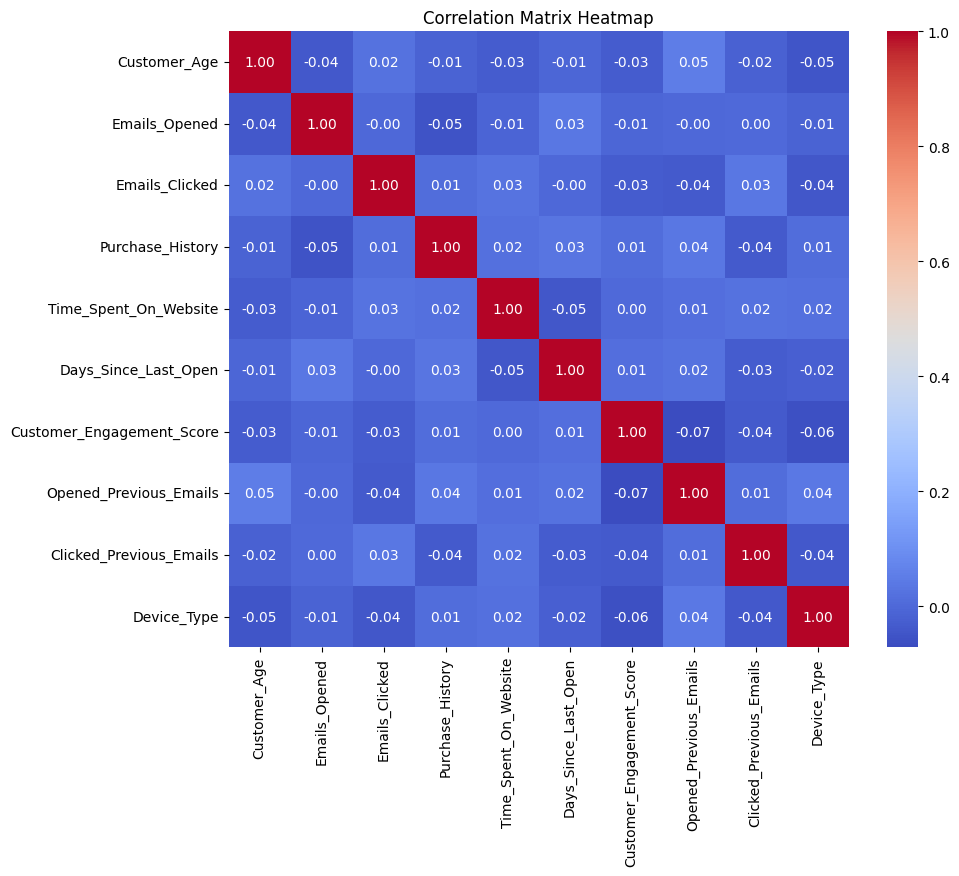

In [15]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

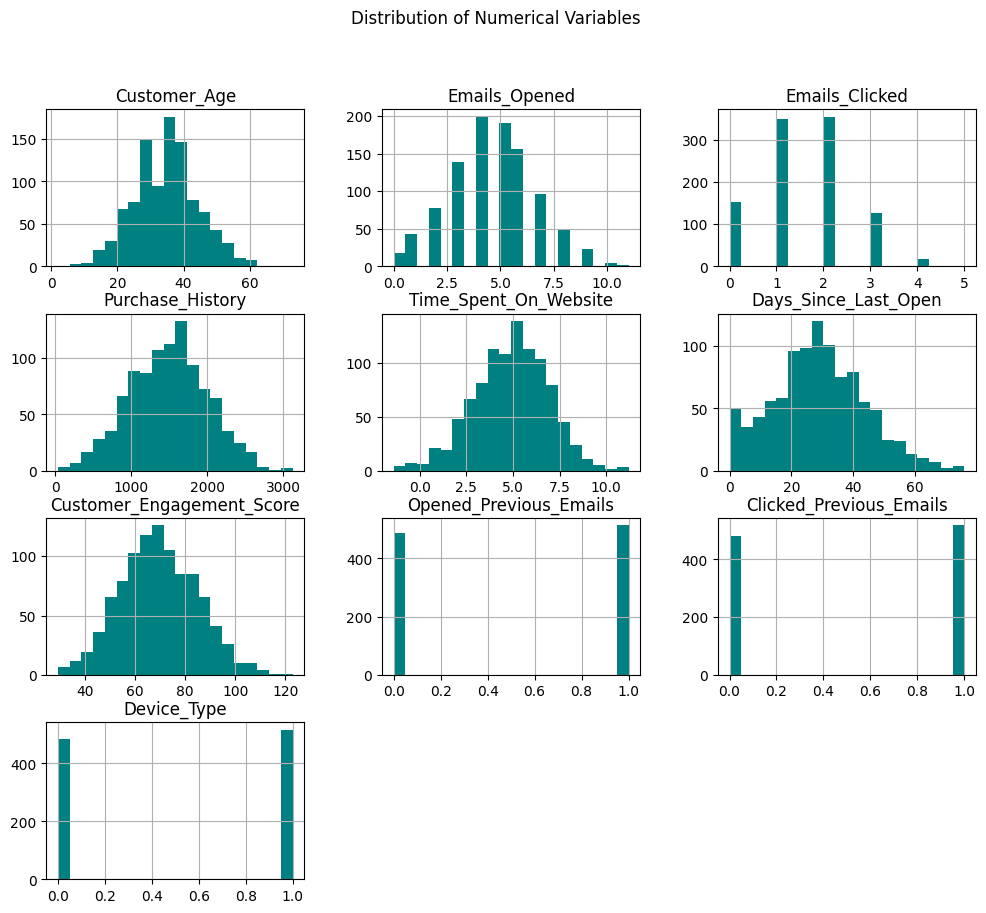

In [16]:
# Data Visualizations
# Histogram of numerical variables
df.hist(figsize=(12, 10), bins=20, color='teal')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

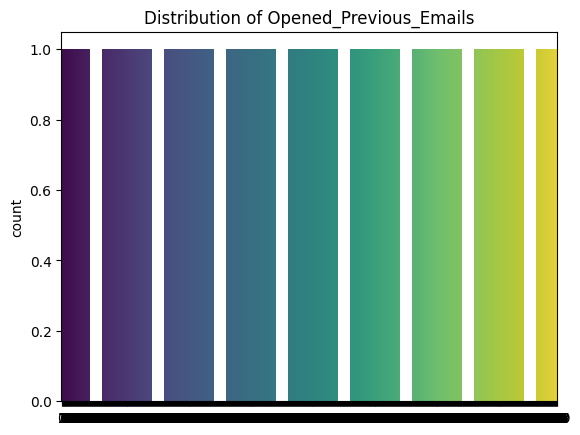

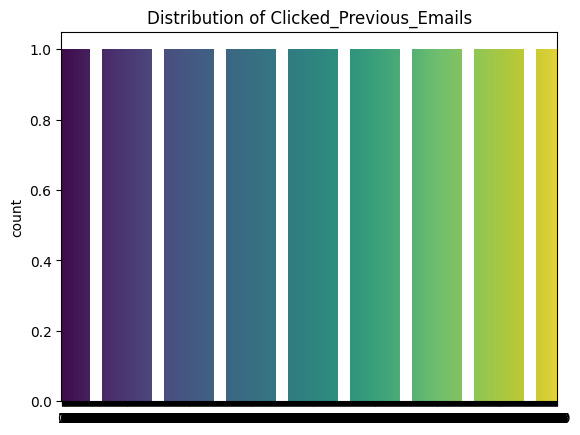

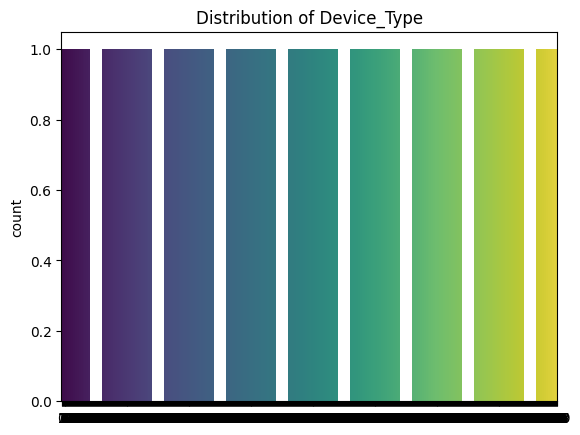

In [17]:
# Distribution of categorical variables
categorical_vars = ['Opened_Previous_Emails', 'Clicked_Previous_Emails', 'Device_Type']
for var in categorical_vars:
    sns.countplot(df[var], palette='viridis')
    plt.title(f"Distribution of {var}")
    plt.show()

In [18]:
#Outlier detection

In [19]:
# Boxplots for numerical variables segmented by the target variable
numerical_vars = [
    'Customer_Age', 'Emails_Opened', 'Emails_Clicked',
    'Purchase_History', 'Time_Spent_On_Website',
    'Days_Since_Last_Open', 'Customer_Engagement_Score'
]

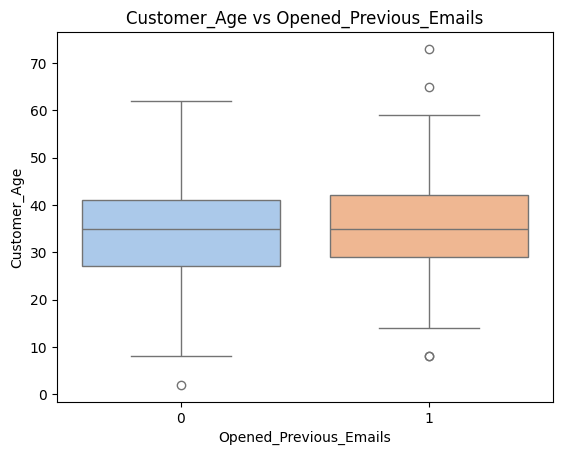

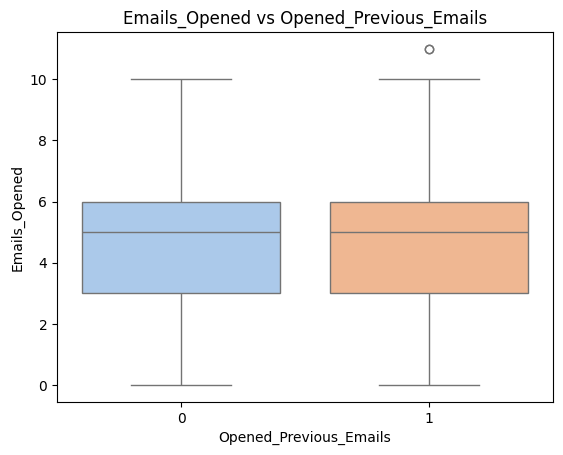

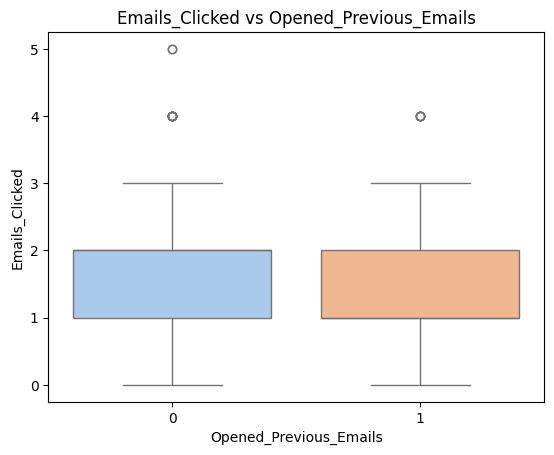

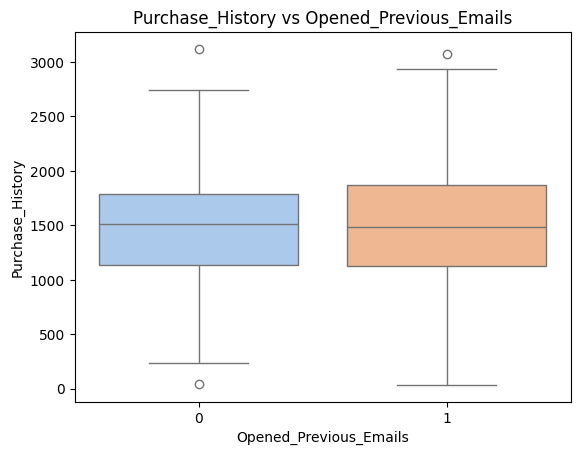

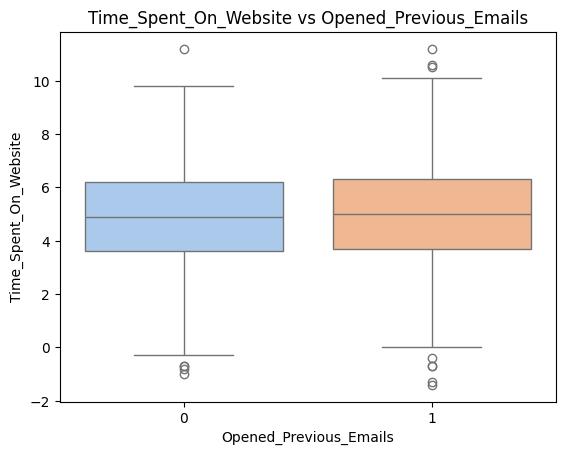

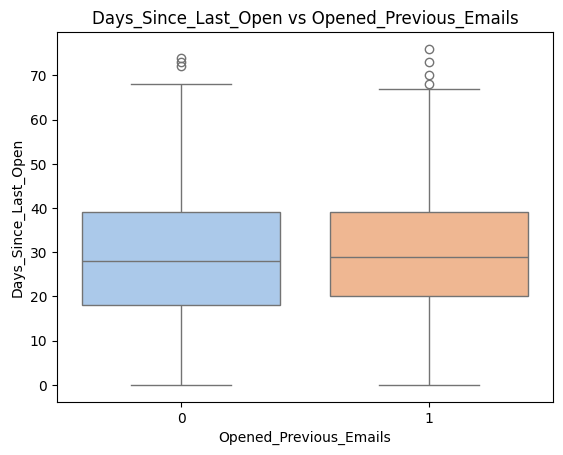

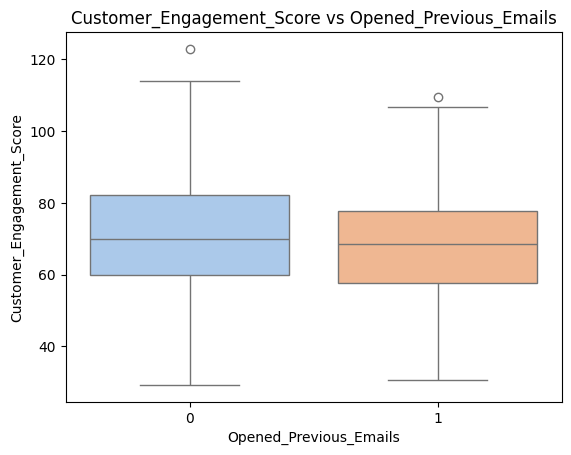

In [20]:
#Boxplot for comparing groups
for var in numerical_vars:
    sns.boxplot(df, x='Opened_Previous_Emails', y=var, palette='pastel')
    plt.title(f"{var} vs Opened_Previous_Emails")
    plt.show()

In [21]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for column in numerical_vars:
    skewness = skew(df[column])
    kurt = kurtosis(df[column])
    print(f"{column}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}")


Skewness and Kurtosis:
Customer_Age: Skewness = 0.11, Kurtosis = 0.06
Emails_Opened: Skewness = 0.08, Kurtosis = -0.15
Emails_Clicked: Skewness = 0.25, Kurtosis = -0.24
Purchase_History: Skewness = -0.00, Kurtosis = -0.23
Time_Spent_On_Website: Skewness = -0.18, Kurtosis = 0.14
Days_Since_Last_Open: Skewness = 0.22, Kurtosis = -0.11
Customer_Engagement_Score: Skewness = 0.12, Kurtosis = -0.16


In [22]:
#Scaling data using standard scaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns to be scaled
numerical_columns = [
    'Customer_Age',
    'Emails_Opened',
    'Emails_Clicked',
    'Purchase_History',
    'Time_Spent_On_Website',
    'Days_Since_Last_Open',
    'Customer_Engagement_Score'
]

# Separating features (X) and target (y)
X = df[numerical_columns]
y = df['Opened_Previous_Emails']  # Assuming this is the target

# Initialize the scaler
scaler = StandardScaler()

# Standardizing the features (X)
X_scaled = scaler.fit_transform(X)

# Create a DataFrame from the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_columns)

In [24]:
# Check for categorical columns
categorical_cols = ['Clicked_Previous_Emails', 'Device_Type']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Clicked_Previous_Emails: [1 0]
Device_Type: [1 0]


In [25]:
#Model Building

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
# Splitting the dataset into features (X) and target (y)
X =df.drop(columns=['Opened_Previous_Emails'])  # Features
y = df['Opened_Previous_Emails']  # Target

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Data Preprocessing and Model Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Classification model
])

In [30]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [31]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.44      0.46        97
           1       0.51      0.55      0.53       103

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
 [[43 54]
 [46 57]]


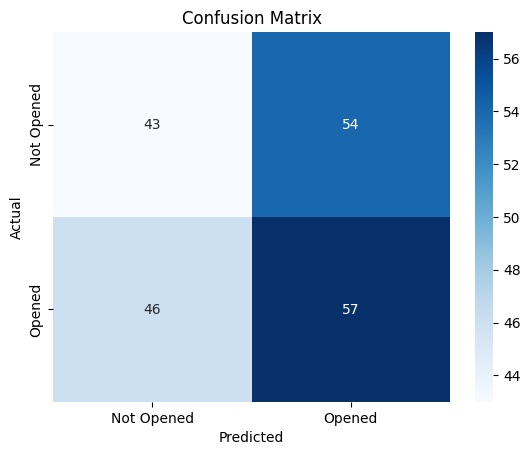

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Opened', 'Opened'], yticklabels=['Not Opened', 'Opened'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
import pickle # Model Saving

In [36]:
# Save the trained model using pickle
model_path = 'email_open_prediction_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(pipeline, model_file)
print(f"Model saved at: {model_path}")

Model saved at: email_open_prediction_model.pkl
